In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


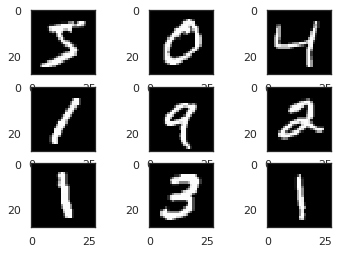

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

In [39]:

# load dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

pd.Series(trainy).value_counts()





In [41]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [46]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [47]:
Y_train = to_categorical(Y_train, num_classes = 10)


In [48]:
random_seed = 2


In [54]:
# Split the train and the validation set for the fitting
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

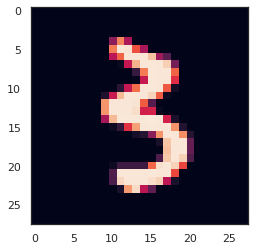

In [55]:
g = plt.imshow(X_train[0][:,:,0])


In [56]:
# Set the CNN model 
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [57]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)


In [58]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])


In [59]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [72]:
epochs = 30 # Turn epochs to 30 to get 0.9967 accuracy
batch_size = 86

In [73]:
# With data augmentation to prevent overfitting (accuracy 0.99286)

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [ ]:
# Fit the model
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/30
 - 165s - loss: 2.3013 - accuracy: 0.1114 - val_loss: 2.3007 - val_accuracy: 0.1163
Epoch 2/30
 - 162s - loss: 2.3013 - accuracy: 0.1112 - val_loss: 2.3007 - val_accuracy: 0.1163
Epoch 3/30
 - 185s - loss: 2.3013 - accuracy: 0.1115 - val_loss: 2.3008 - val_accuracy: 0.1163
Epoch 4/30
 - 210s - loss: 2.3013 - accuracy: 0.1115 - val_loss: 2.3008 - val_accuracy: 0.1163
Epoch 5/30
 - 203s - loss: 2.3013 - accuracy: 0.1113 - val_loss: 2.3007 - val_accuracy: 0.1163
Epoch 6/30
 - 208s - loss: 2.3013 - accuracy: 0.1115 - val_loss: 2.3007 - val_accuracy: 0.1163
Epoch 7/30
 - 203s - loss: 2.3013 - accuracy: 0.1112 - val_loss: 2.3008 - val_accuracy: 0.1163
Epoch 8/30
 - 274s - loss: 2.3013 - accuracy: 0.1117 - val_loss: 2.3008 - val_accuracy: 0.1163
Epoch 9/30
 - 215s - loss: 2.3013 - accuracy: 0.1110 - val_loss: 2.3007 - val_accuracy: 0.1163
Epoch 10/30
 - 225s - loss: 2.3013 - accuracy: 0.1115 - val_loss: 2.3007 - val_accuracy: 0.1163
Epoch 11/30
 - 198s - loss: 2.3014 - accuracy: 0.